In [1]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import pandas as pd
import pickle 
from os import path

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [4]:
train_data = pd.read_csv("C:\\Users\\shahr\\OneDrive\\Desktop\\oasis_longitudinal.csv")

In [5]:
train_data.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [6]:
del train_data['Subject ID']
del train_data['MRI ID']
del train_data['Visit']
del train_data['MR Delay']
del train_data['EDUC']
del train_data['SES']


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Group   373 non-null    object 
 1   M/F     373 non-null    object 
 2   Hand    373 non-null    object 
 3   Age     373 non-null    int64  
 4   MMSE    371 non-null    float64
 5   CDR     373 non-null    float64
 6   eTIV    373 non-null    int64  
 7   nWBV    373 non-null    float64
 8   ASF     373 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 26.4+ KB


In [8]:
train_data['M/F'].value_counts()

M/F
F    213
M    160
Name: count, dtype: int64

In [9]:
train_data['Group'].value_counts()

Group
Nondemented    190
Demented       146
Converted       37
Name: count, dtype: int64

In [10]:
train_data['Hand'].value_counts()

Hand
R    373
Name: count, dtype: int64

In [11]:
train_data.to_csv('processed.csv')

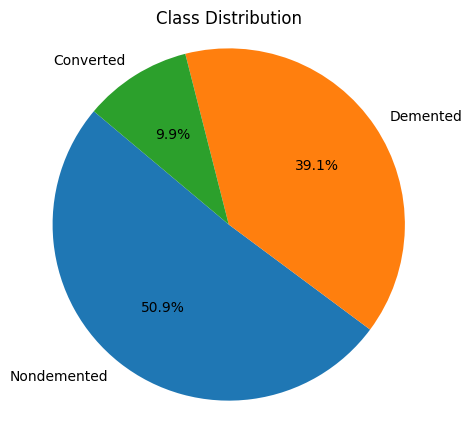

In [12]:
labels = train_data['Group'].value_counts().index
sizes = train_data['Group'].value_counts().values
plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal') 
plt.title('Class Distribution')
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

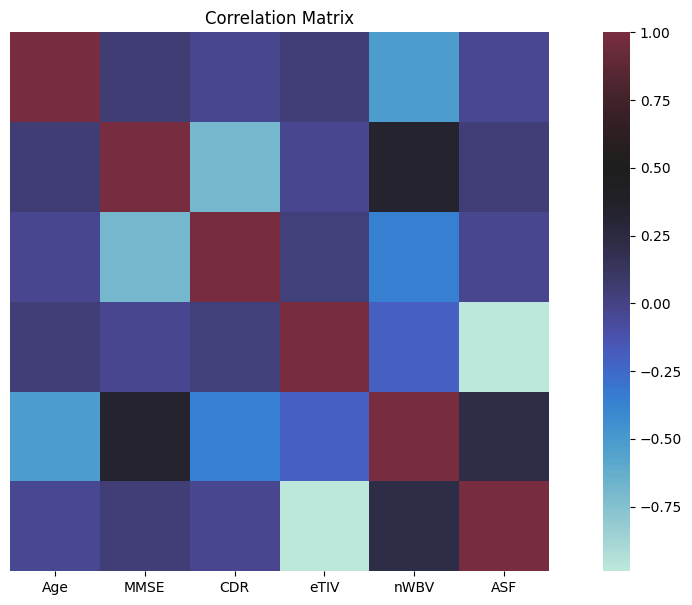

In [14]:
numeric_data = train_data.select_dtypes(include=['number'])

fig, ax = plt.subplots(1, 1, figsize=(14, 7))
sns.heatmap(numeric_data.corr(), square=True, center=0.5, yticklabels=False).set_title('Correlation Matrix')


In [15]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
train_data['Group']= label_encoder.fit_transform(train_data['Group'])
train_data['M/F']= label_encoder.fit_transform(train_data['M/F'])
train_data['Hand']= label_encoder.fit_transform(train_data['Hand'])
train_data['Group'].unique()
train_data['M/F'].unique()
train_data['Hand'].unique()

array([0])

In [16]:
X = train_data.drop(["Group"],axis =1)
y = train_data["Group"]

In [17]:
X.columns

Index(['M/F', 'Hand', 'Age', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF'], dtype='object')

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)

In [19]:
X_train.shape

(298, 8)

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
ML_Model = []
accuracy = []
precision = []
recall = []
f1score = []

def storeResults(model, a,b,c,d):
    ML_Model.append(model)
    accuracy.append(round(a, 3))
    precision.append(round(b, 3))
    recall.append(round(c, 3))
    f1score.append(round(d, 3))

#NCA

In [25]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

nca = NeighborhoodComponentsAnalysis(random_state=42)
nca.fit(X_imputed, y)


NeighborhoodComponentsAnalysis(random_state=42)

#KNN

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_imputed, y)


y_pred = knn.predict(X_imputed)
knn_acc = accuracy_score(y, y_pred)
knn_prec = precision_score(y, y_pred, average='weighted')
knn_rec = recall_score(y, y_pred, average='weighted')
knn_f1 = f1_score(y, y_pred, average='weighted')


print("KNN Accuracy:", knn_acc)
print("KNN Precision:", knn_prec)
print("KNN Recall:", knn_rec)
print("KNN F1 Score:", knn_f1)


KNN Accuracy: 0.8016085790884718
KNN Precision: 0.8242987723049364
KNN Recall: 0.8016085790884718
KNN F1 Score: 0.8091743938842444


In [28]:
storeResults('KNN',knn_acc,knn_prec,knn_rec,knn_f1)

#KNN-NCA

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NeighborhoodComponentsAnalysis
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)


nca = NeighborhoodComponentsAnalysis(random_state=42)
X_nca = nca.fit_transform(X_imputed, y)


knn_nca = KNeighborsClassifier(n_neighbors=3)
knn_nca.fit(X_nca, y)


y_pred = knn_nca.predict(X_nca)
knn1_acc = accuracy_score(y, y_pred)
knn1_prec = precision_score(y, y_pred, average='weighted')
knn1_rec = recall_score(y, y_pred, average='weighted')
knn1_f1 = f1_score(y, y_pred, average='weighted')


print("KNN (with NCA) Accuracy:", knn1_acc)
print("KNN (with NCA) Precision:", knn1_prec)
print("KNN (with NCA) Recall:", knn1_rec)
print("KNN (with NCA) F1 Score:", knn1_f1)


KNN (with NCA) Accuracy: 0.900804289544236
KNN (with NCA) Precision: 0.9024342660071241
KNN (with NCA) Recall: 0.900804289544236
KNN (with NCA) F1 Score: 0.9014891008477453


In [31]:
storeResults('KNN-NCA',knn1_acc,knn1_prec,knn1_rec,knn1_f1)

#DECISION TREE 

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)


tree = DecisionTreeClassifier(random_state=10)
tree.fit(X_imputed, y)


y_pred = tree.predict(X_imputed)
dt_acc = accuracy_score(y, y_pred)
dt_prec = precision_score(y, y_pred, average='weighted')
dt_rec = recall_score(y, y_pred, average='weighted')
dt_f1 = f1_score(y, y_pred, average='weighted')


print("Decision Tree Accuracy:", dt_acc)
print("Decision Tree Precision:", dt_prec)
print("Decision Tree Recall:", dt_rec)
print("Decision Tree F1 Score:", dt_f1)


Decision Tree Accuracy: 1.0
Decision Tree Precision: 1.0
Decision Tree Recall: 1.0
Decision Tree F1 Score: 1.0


In [101]:
storeResults('Decision Tree',dt_acc,dt_prec,dt_rec,dt_f1)

#DECISION TREE WITH NCA

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import NeighborhoodComponentsAnalysis


imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)


nca = NeighborhoodComponentsAnalysis(random_state=42)
nca.fit(X_imputed, y)

X_nca = nca.transform(X_imputed)


tree_nca = DecisionTreeClassifier(random_state=10)
tree_nca.fit(X_nca, y)


y_pred = tree_nca.predict(X_nca)

dt1_acc = accuracy_score(y, y_pred)
dt1_prec = precision_score(y, y_pred, average='weighted')
dt1_rec = recall_score(y, y_pred, average='weighted')
dt1_f1 = f1_score(y, y_pred, average='weighted')


print("Decision Tree (NCA) Accuracy:", dt1_acc)
print("Decision Tree (NCA) Precision:", dt1_prec)
print("Decision Tree (NCA) Recall:", dt1_rec)
print("Decision Tree (NCA) F1 Score:", dt1_f1)


Decision Tree (NCA) Accuracy: 1.0
Decision Tree (NCA) Precision: 1.0
Decision Tree (NCA) Recall: 1.0
Decision Tree (NCA) F1 Score: 1.0


In [102]:
storeResults('Decision Tree - NCA',dt1_acc,dt1_prec,dt1_rec,dt1_f1)

#Random Forest

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)


forest = RandomForestClassifier(max_depth=2, random_state=0)
forest.fit(X_imputed, y)


y_pred = forest.predict(X_imputed)


rf_acc = accuracy_score(y, y_pred)
rf_prec = precision_score(y, y_pred, average='weighted')
rf_rec = recall_score(y, y_pred, average='weighted')
rf_f1 = f1_score(y, y_pred, average='weighted')


print("===== Random Forest Classifier (without NCA) =====")
print("Accuracy :", rf_acc)
print("Precision:", rf_prec)
print("Recall   :", rf_rec)
print("F1 Score :", rf_f1)


===== Random Forest Classifier (without NCA) =====
Accuracy : 0.8900804289544236
Precision: 0.8018879701348806
Recall   : 0.8900804289544236
F1 Score : 0.8436630796917919


In [103]:
storeResults('Random Forest',rf_acc,rf_prec,rf_rec,rf_f1)

#RANDOM FOREST WITH NCA

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import NeighborhoodComponentsAnalysis
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)


nca = NeighborhoodComponentsAnalysis(random_state=42)
X_nca = nca.fit_transform(X_imputed, y)


forest_nca = RandomForestClassifier(max_depth=2, random_state=0)
forest_nca.fit(X_nca, y)


y_pred = forest_nca.predict(X_nca)

rf1_acc = accuracy_score(y, y_pred)
rf1_prec = precision_score(y, y_pred, average='weighted')
rf1_rec = recall_score(y, y_pred, average='weighted')
rf1_f1 = f1_score(y, y_pred, average='weighted')


print("===== Random Forest Classifier (with NCA) =====")
print("Accuracy :", rf1_acc)
print("Precision:", rf1_prec)
print("Recall   :", rf1_rec)
print("F1 Score :", rf1_f1)


===== Random Forest Classifier (with NCA) =====
Accuracy : 0.6568364611260054
Precision: 0.695769470720151
Recall   : 0.6568364611260054
F1 Score : 0.5952452594220008


In [104]:
storeResults('Random Forest - NCA',rf1_acc,rf1_prec,rf1_rec,rf1_f1)

#AdaBoost

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)


ada = AdaBoostClassifier(n_estimators=100, random_state=0)


ada.fit(X_imputed, y)


y_pred = ada.predict(X_imputed)


ab_acc = accuracy_score(y_pred, y)
ab_prec = precision_score(y_pred, y, average='weighted')
ab_rec = recall_score(y_pred, y, average='weighted')
ab_f1 = f1_score(y_pred, y, average='weighted')


print("Accuracy:", ab_acc)
print("Precision:", ab_prec)
print("Recall:", ab_rec)
print("F1 Score:", ab_f1)


Accuracy: 0.7292225201072386
Precision: 0.6907203207274146
Recall: 0.7292225201072386
F1 Score: 0.6890198921759105


In [105]:
storeResults('AdaBoost',ab_acc,ab_prec,ab_rec,ab_f1)

#ADABOOST WITH NCA

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import NeighborhoodComponentsAnalysis
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)


nca = NeighborhoodComponentsAnalysis(random_state=42)
X_nca = nca.fit_transform(X_imputed, y)


ada_nca = AdaBoostClassifier(n_estimators=100, random_state=0)


ada_nca.fit(X_nca, y)


y_pred = ada_nca.predict(X_nca)


ab1_acc = accuracy_score(y_pred, y)
ab1_prec = precision_score(y_pred, y, average='weighted')
ab1_rec = recall_score(y_pred, y, average='weighted')
ab1_f1 = f1_score(y_pred, y, average='weighted')


print("AdaBoost with NCA:")
print("Accuracy:", ab1_acc)
print("Precision:", ab1_prec)
print("Recall:", ab1_rec)
print("F1 Score:", ab1_f1)


AdaBoost with NCA:
Accuracy: 0.7319034852546917
Precision: 0.8601141198142075
Recall: 0.7319034852546917
F1 Score: 0.7760355942875551


In [106]:
storeResults('AdaBoost - NCA',ab1_acc,ab1_prec,ab1_rec,ab1_f1)

#Voting Classifier

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)


clf1 = AdaBoostClassifier(n_estimators=100, random_state=0)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)

eclf1 = VotingClassifier(estimators=[('ad', clf1), ('rf', clf2)], voting='soft')


eclf1.fit(X_imputed, y)


y_pred = eclf1.predict(X_imputed)


vot_acc = accuracy_score(y_pred, y)
vot_prec = precision_score(y_pred, y, average='weighted')
vot_rec = recall_score(y_pred, y, average='weighted')
vot_f1 = f1_score(y_pred, y, average='weighted')


print("Voting Classifier with AdaBoost and RandomForest:")
print("Accuracy:", vot_acc)
print("Precision:", vot_prec)
print("Recall:", vot_rec)
print("F1 Score:", vot_f1)


Voting Classifier with AdaBoost and RandomForest:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [107]:
storeResults('Voting CLassifier',vot_acc,vot_prec,vot_rec,vot_f1)

#VOTING CLASSIFIER WITH NCA

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import NeighborhoodComponentsAnalysis


imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)  


clf1 = AdaBoostClassifier(n_estimators=100, random_state=0)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)


nca = NeighborhoodComponentsAnalysis(random_state=0)
nca.fit(X_imputed, y)


vot_nca = VotingClassifier(estimators=[('ad', clf1), ('rf', clf2)], voting='soft')


vot_nca.fit(nca.transform(X_imputed), y)


y_pred = vot_nca.predict(nca.transform(X_imputed))


vot1_acc = accuracy_score(y_pred, y)
vot1_prec = precision_score(y_pred, y, average='weighted')
vot1_rec = recall_score(y_pred, y, average='weighted')
vot1_f1 = f1_score(y_pred, y, average='weighted')


print("Voting Classifier with AdaBoost and RandomForest on NCA-transformed data:")
print("Accuracy:", vot1_acc)
print("Precision:", vot1_prec)
print("Recall:", vot1_rec)
print("F1 Score:", vot1_f1)


Voting Classifier with AdaBoost and RandomForest on NCA-transformed data:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [108]:
storeResults('Voting CLassifier - NCA',vot1_acc,vot1_prec,vot1_rec,vot1_f1)

#Stacking Classifier

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)  


estimators = [('rf', RandomForestClassifier(n_estimators=10)), ('mlp', MLPClassifier(random_state=1, max_iter=30))]


clf = StackingClassifier(estimators=estimators, final_estimator=LGBMClassifier(n_estimators=10))


clf.fit(X_imputed, y)


y_pred = clf.predict(X_imputed)


stac_acc = accuracy_score(y_pred, y)
stac_prec = precision_score(y_pred, y, average='weighted')
stac_rec = recall_score(y_pred, y, average='weighted')
stac_f1 = f1_score(y_pred, y, average='weighted')


print("Stacking Classifier (RandomForest + MLP with LGBM final estimator):")
print("Accuracy:", stac_acc)
print("Precision:", stac_prec)
print("Recall:", stac_rec)
print("F1 Score:", stac_f1)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000255 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 405
[LightGBM] [Info] Number of data points in the train set: 373, number of used features: 6
[LightGBM] [Info] Start training from score -2.310661
[LightGBM] [Info] Start training from score -0.937972
[LightGBM] [Info] Start training from score -0.674554
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

In [109]:
storeResults('Stacking CLassifier',stac_acc,stac_prec,stac_rec,stac_f1)

#STACKING WITH NCA

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import NeighborhoodComponentsAnalysis


imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)  


nca = NeighborhoodComponentsAnalysis(random_state=42)
X_nca = nca.fit_transform(X_imputed, y)

# Define base estimators
estimators = [('rf', RandomForestClassifier(n_estimators=10)), ('mlp', MLPClassifier(random_state=1, max_iter=30))]


stac_nca = StackingClassifier(estimators=estimators, final_estimator=LGBMClassifier(n_estimators=10))


stac_nca.fit(X_nca, y)


y_pred = stac_nca.predict(X_nca)


stac1_acc = accuracy_score(y_pred, y)
stac1_prec = precision_score(y_pred, y, average='weighted')
stac1_rec = recall_score(y_pred, y, average='weighted')
stac1_f1 = f1_score(y_pred, y, average='weighted')


print("Stacking Classifier (RandomForest + MLP with LGBM final estimator on NCA-transformed data):")
print("Accuracy:", stac1_acc)
print("Precision:", stac1_prec)
print("Recall:", stac1_rec)
print("F1 Score:", stac1_f1)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000148 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 406
[LightGBM] [Info] Number of data points in the train set: 373, number of used features: 6
[LightGBM] [Info] Start training from score -2.310661
[LightGBM] [Info] Start training from score -0.937972
[LightGBM] [Info] Start training from score -0.674554
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furt

In [110]:
storeResults('Stacking CLassifier - NCA',stac1_acc,stac1_prec,stac1_rec,stac1_f1)

#CNN

In [76]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D

verbose, epoch, batch_size = 1, 100, 4
activationFunction='relu'

In [ ]:

X_train = X_train.reshape(-1, X_train.shape[1], 1)
X_test = X_test.reshape(-1, X_test.shape[1], 1)


Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)


In [84]:
def CNN():
    
    cnnmodel = Sequential()
    cnnmodel.add(Conv1D(filters=128, kernel_size=2, activation='relu',input_shape=(X_train.shape[1],X_train.shape[2])))
    cnnmodel.add(MaxPooling1D(pool_size=2))
    cnnmodel.add(Dropout(rate=0.2))
    cnnmodel.add(Flatten())
    cnnmodel.add(Dense(3, activation='softmax'))
    cnnmodel.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
    cnnmodel.summary()
    return cnnmodel

cnnmodel = CNN()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_5 (Conv1D)               │ (None, 7, 128)         │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ (None, 3, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 3, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 384)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3)              │         1,155 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,539 (6.01 KB)

 Trainable params: 1,539 (6.01 KB)

 Non-trainable params: 0 (0.00 B)

In [85]:
modelhistory = cnnmodel.fit(X_train, Y_train, epochs=100, verbose=verbose, validation_split=0.2, batch_size = batch_size)

Epoch 1/100


60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.2453 - loss: nan - val_accuracy: 0.1000 - val_loss: nan
Epoch 2/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.1079 - loss: nan - val_accuracy: 0.1000 - val_loss: nan
Epoch 3/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.0858 - loss: nan - val_accuracy: 0.1000 - val_loss: nan
Epoch 4/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.0985 - loss: nan - val_accuracy: 0.1000 - val_loss: nan
Epoch 5/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0713 - loss: nan - val_accuracy: 0.1000 - val_loss: nan
Epoch 6/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.0715 - loss: nan - val_accuracy: 0.1000 - val_loss: nan
Epoch 7/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.0872 - loss: nan - val_accuracy: 0.1000 - val_loss: nan
Epoch 8/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0587 - loss: nan - val_accuracy: 0.1000 - val_loss: nan
Epoch 9/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s

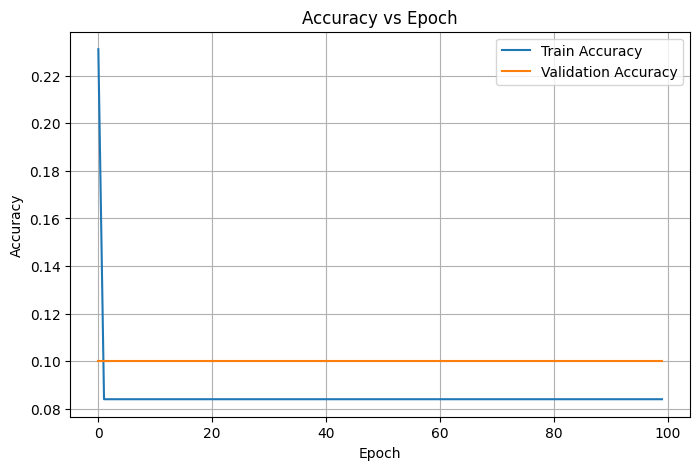

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Accuracy: 0.1467
Precision: 0.0215
Recall: 0.1467
F1 Score: 0.0375


In [ ]:
# 1. Plot of accuracy vs epoch for train and validation dataset
plt.figure(figsize=(8,5))
plt.plot(modelhistory.history['accuracy'], label='Train Accuracy')
plt.plot(modelhistory.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy vs Epoch")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()



cnnpredictions = cnnmodel.predict(X_test, verbose=1)
y_pred = np.argmax(cnnpredictions, axis=1)
y_true = np.argmax(Y_test, axis=1)  

cnn_acc = accuracy_score(y_true, y_pred)
cnn_prec = precision_score(y_true, y_pred, average='weighted')
cnn_rec = recall_score(y_true, y_pred, average='weighted')
cnn_f1 = f1_score(y_true, y_pred, average='weighted')

# 2. Print results
print(f"Accuracy: {cnn_acc:.4f}")
print(f"Precision: {cnn_prec:.4f}")
print(f"Recall: {cnn_rec:.4f}")
print(f"F1 Score: {cnn_f1:.4f}")


In [111]:
storeResults('CNN',cnn_acc,cnn_prec,cnn_rec,cnn_f1)

#CNN + LSTM

In [ ]:
import tensorflow as tf
tf.keras.backend.clear_session()

model_en = tf.keras.models.Sequential([tf.keras.layers.Conv1D(filters=64,kernel_size=5,strides=1,padding="causal",activation="relu",input_shape=(X_train.shape[1],X_train.shape[2])),
    tf.keras.layers.MaxPooling1D(pool_size=2, strides=1, padding="valid"),
    tf.keras.layers.Conv1D(filters=32, kernel_size=3, strides=1, padding="causal", activation="relu"),
    tf.keras.layers.MaxPooling1D(pool_size=2, strides=1, padding="valid"),
    tf.keras.layers.LSTM(128, return_sequences=True),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(3)
])

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(5e-4, decay_steps=1000000, decay_rate=0.98, staircase=False)

model_en.compile(loss=tf.keras.losses.MeanSquaredError(),optimizer=tf.keras.optimizers.SGD(learning_rate=lr_schedule, momentum=0.8),metrics=['acc'])
model_en.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 8, 64)          │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 7, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 7, 32)          │         6,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 6, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 6, 128)         │        82,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 768)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        98,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 191,651 (748.64 KB)

 Trainable params: 191,651 (748.64 KB)

 Non-trainable params: 0 (0.00 B)

In [91]:
modelhistory = model_en.fit(X_train, Y_train, epochs=100, verbose=verbose, validation_split=0.2, batch_size = batch_size)

Epoch 1/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - acc: 0.4507 - loss: 0.3029 - val_acc: 0.5333 - val_loss: 0.3190
Epoch 2/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - acc: 0.5151 - loss: 0.3093 - val_acc: 0.5333 - val_loss: 0.2842
Epoch 3/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - acc: 0.5243 - loss: 0.2761 - val_acc: 0.5333 - val_loss: 0.2589
Epoch 4/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - acc: 0.5744 - loss: 0.2528 - val_acc: 0.5333 - val_loss: 0.2403
Epoch 5/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - acc: 0.5284 - loss: 0.2345 - val_acc: 0.5333 - val_loss: 0.2266
Epoch 6/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - acc: 0.5159 - loss: 0.2233 - val_acc: 0.5333 - val_loss: 0.2166
Epoch 7/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - acc: 0.5205 - loss: 0.2158 - val_acc: 0.5333 - val_loss: 0.2095
Epoch 8/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - acc: 0.5312 - loss: 0.2038 - val_acc: 0.5333 - val_loss: 0.2042
Epoch 9/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - ac

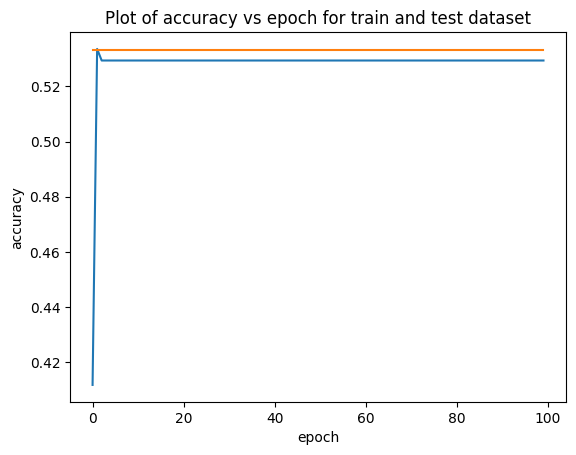

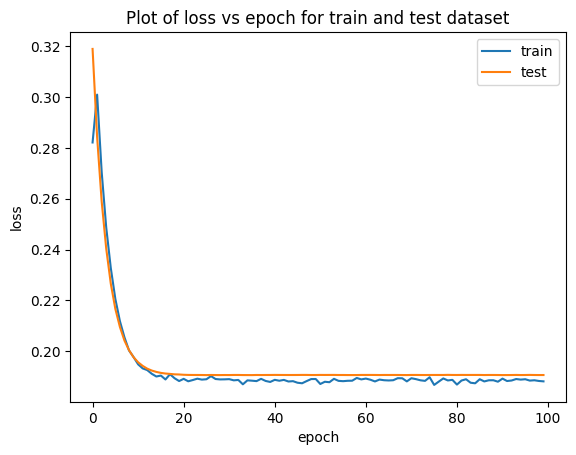

In [97]:
# Plot of accuracy vs epoch for train and test dataset
plt.plot(modelhistory.history['acc'])
plt.plot(modelhistory.history['val_acc'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

# Plot of loss vs epoch for train and test dataset
plt.plot(modelhistory.history['loss'])
plt.plot(modelhistory.history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
y_pred = model_en.predict(X_test, verbose=1)
y_pred = np.argmax(y_pred,axis=1)



ense_acc = accuracy_score(y_pred, y_test)
ense_prec = precision_score(y_pred, y_test,average='weighted')
ense_rec = recall_score(y_pred, y_test,average='weighted')
ense_f1 = f1_score(y_pred, y_test,average='weighted')

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 288ms/step


In [112]:
storeResults('CNN + LSTM',ense_acc,ense_prec,ense_rec,ense_f1)

#Comparison

In [ ]:

result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                        'Precision': precision,
                        'Recall'   : recall,
                        'F1-Score': f1score
                      })

In [114]:
result

,ML Model,Accuracy,Precision,Recall,F1-Score
0,KNN,0.802,0.824,0.802,0.809
1,KNN-NCA,0.901,0.902,0.901,0.901
2,Decision Tree,1.000,1.000,1.000,1.000
3,Decision Tree,1.000,1.000,1.000,1.000
4,Decision Tree,1.000,1.000,1.000,1.000
5,Decision Tree - NCA,1.000,1.000,1.000,1.000
6,Random Forest,0.890,0.802,0.890,0.844
7,Random Forest - NCA,0.657,0.696,0.657,0.595
8,AdaBoost,0.729,0.691,0.729,0.689
9,AdaBoost - NCA,0.732,0.860,0.732,0.776


#Modelling

In [116]:
import joblib
filename = 'model1.sav'
filename1 = 'model2.sav'
joblib.dump(clf, filename)
joblib.dump(eclf1, filename1)

['model2.sav']

#Graph

In [117]:
classifier = ML_Model
y_pos = np.arange(len(classifier))

#Accuracy

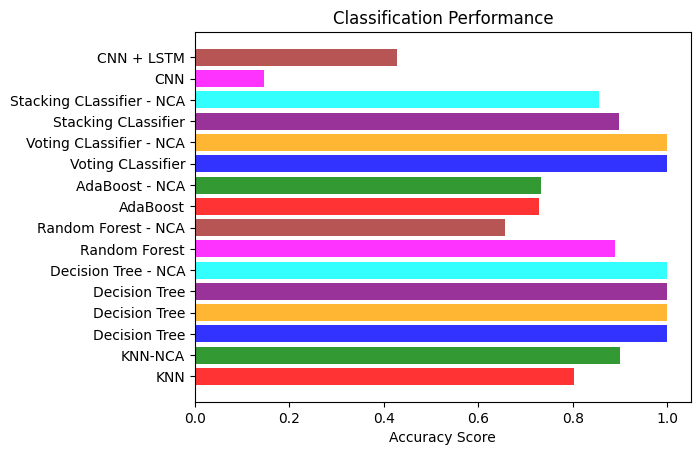

In [122]:
import matplotlib.pyplot as plt2

colors = ['red', 'green', 'blue', 'orange', 'purple', 'cyan', 'magenta', 'brown'][:len(classifier)]

plt2.barh(y_pos, accuracy, align='center', alpha=0.8, color=colors)
plt2.yticks(y_pos, classifier)
plt2.xlabel('Accuracy Score')
plt2.title('Classification Performance')
plt2.show()


#Precision

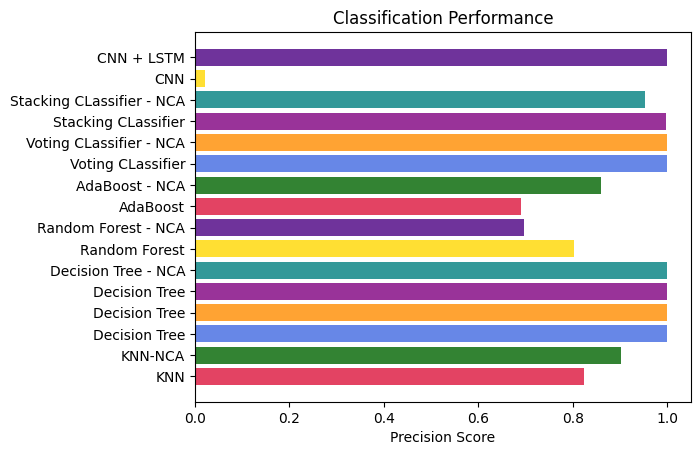

In [123]:
import matplotlib.pyplot as plt2

colors = ['crimson', 'darkgreen', 'royalblue', 'darkorange', 'purple', 'teal', 'gold', 'indigo'][:len(classifier)]

plt2.barh(y_pos, precision, align='center', alpha=0.8, color=colors)
plt2.yticks(y_pos, classifier)
plt2.xlabel('Precision Score')
plt2.title('Classification Performance')
plt2.show()


#Recall

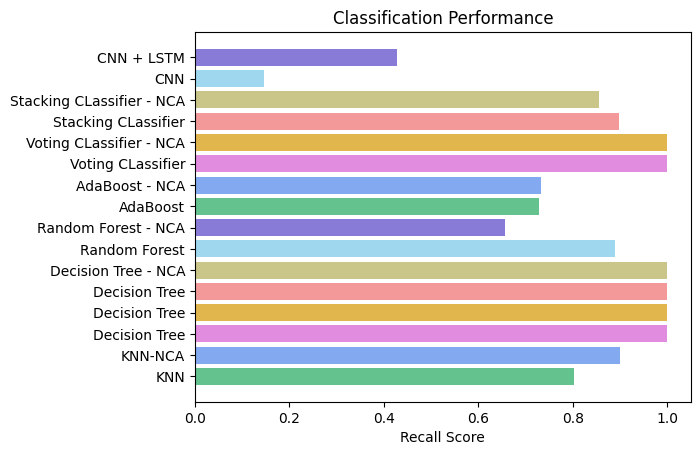

In [124]:
import matplotlib.pyplot as plt2


# Multicolor list
colors = ['mediumseagreen', 'cornflowerblue', 'orchid', 'goldenrod', 'lightcoral', 'darkkhaki', 'skyblue', 'slateblue'][:len(classifier)]

plt2.barh(y_pos, recall, align='center', alpha=0.8, color=colors)
plt2.yticks(y_pos, classifier)
plt2.xlabel('Recall Score')
plt2.title('Classification Performance')
plt2.show()


#F1 Score

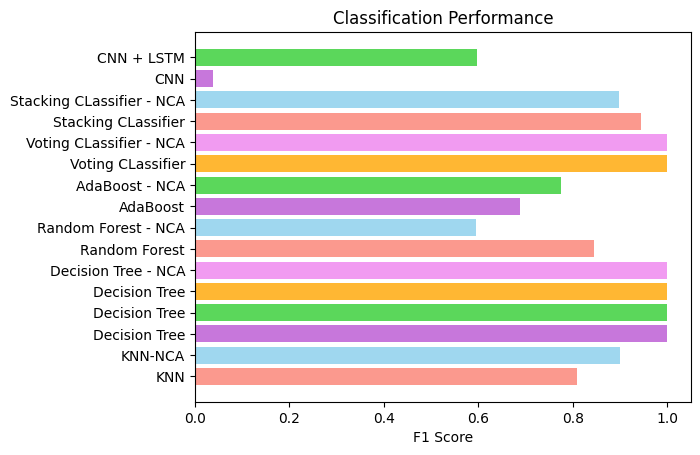

In [125]:
import matplotlib.pyplot as plt2

# Multicolor list (same length as number of classifiers)
colors = ['salmon', 'skyblue', 'mediumorchid', 'limegreen', 'orange', 'violet'][:len(classifier)]

plt2.barh(y_pos, f1score, align='center', alpha=0.8, color=colors)
plt2.yticks(y_pos, classifier)
plt2.xlabel('F1 Score')
plt2.title('Classification Performance')
plt2.show()
